In [66]:
#tabelas  necessarias apra usar no sistema

import requests 
import pandas as pd 
from plyer import notification
from datetime import datetime
import matplotlib.pyplot as plt
import sqlite3

In [67]:
# esta linha de código faz a requisição, da URL https://restcountries.com/v3.1/all e buscando os dados

url = 'https://restcountries.com/v3.1/all'
etapa = 'Buscar Dados'
resposta = requests.get(url).json()
resposta_code = requests.get(url).status_code

In [68]:
# função que traz um pop-up informativo, para identificar se foi feito a requisição com sucesso ou não!

def alerta(codigo, etapa):
    
    data_atual = datetime.now().strftime('%d/%m/%y %H:%M:%S')

    msg = ''
    
    if resposta_code == 200:
        msg = 'Sucesso'
    else:
        msg = f'Falha Codigo {resposta_code}'
        
    mensagem = f'{msg} no carregamento na {url} na etapa {etapa}\n{data_atual}'
    
    if codigo != 200:
        codigo = 'ATENÇÃO: Conexao com Erro'
    else:
        codigo = 'Conectado com sucesso' 
    
    notification.notify(
        title=codigo,
        message=mensagem,
        timeout=10
    )

alerta(resposta_code, etapa)

In [69]:
# Com a Resposta da requisição foi feito uma função deu agrupamento de dados para saber a quantidade total de população 

def dados():
    
    paises = []
    populacao = []

    for dados in resposta:
        paises.append(dados['name']['common'])
        populacao.append(dados['population'])

    df = pd.DataFrame({'Pais':paises, 'Populacao':populacao})
    
    return df


In [70]:
df_maiores = dados()

In [71]:
#Precisamos somente dos 10 maiores paises com as maiores população, desta forma foi feito um filtro para o dado solicitado

df_top10 = df_maiores.nlargest(10,'Populacao')

Text(0.5, 1.0, 'Top 10 Países por População')

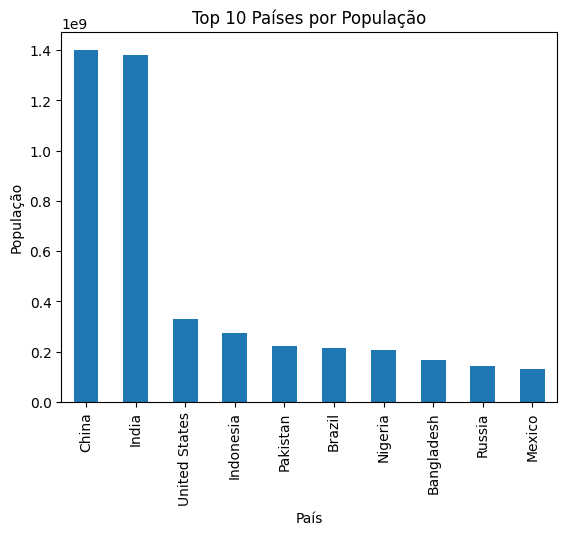

In [73]:
#Devido a necessidade de mostrar isso tebla plotamos um grafico usando o matplotlib

grafico = df_top10.plot(kind='bar', x='Pais', y='Populacao', legend=False)
plt.xlabel('País')
plt.ylabel('População')
plt.title('Top 10 Países por População')

In [74]:
# para uma Analise posteriormente melhor e ter a possiblidade de utilizar localmente, se importou para uma banco de dados
# usando o sqlite3, com a função baixo

def conexao_sql():
    conn = sqlite3.connect('Paises_Final.db')
    df_top10.to_sql('maior_populacao', conn, if_exists='replace', index = False)
    conn.close
    return conn

In [61]:
# função para retornar os dados importar no BD, usando o Select

def dados_sql():
    cursor = conexao_sql().cursor()
    cursor.execute("Select * from maior_populacao")
    result = cursor.fetchall()
    conexao_sql().close
    return result

In [62]:
#impressão dos dados, somente para garantir o fluxo

dados_sql()

[('China', 1402112000),
 ('India', 1380004385),
 ('United States', 329484123),
 ('Indonesia', 273523621),
 ('Pakistan', 220892331),
 ('Brazil', 212559409),
 ('Nigeria', 206139587),
 ('Bangladesh', 164689383),
 ('Russia', 144104080),
 ('Mexico', 128932753)]